In [7]:
from typing import Dict, List, Optional
import numpy as np
import pandas as pd
from datetime import datetime
from typing import Tuple, Dict, Any
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    balanced_accuracy_score,
    confusion_matrix
)

In [8]:
catalog.list()


[
    'pima_raw_summary',
    'pima_raw_zscore_plot',
    'pima_na_summary',
    'pima_na_zscore_plot',
    'pima_no_outliers',
    'pima_no_outliers_summary',
    'pima_no_outliers_zscore_plot',
    'pima_imputed',
    'pima_imputed_summary',
    'pima_imputed_zscore_plot',
    'pima_imputed_density_plot',
    'pima_imputed_density_outcome_plot',
    'pima_imputed_pca_outcome_plot',
    'pima_imputed_t_test_results',
    'pima_imputed_correlogram_plot',
    'X_train',
    'X_test',
    'y_train',
    'y_test',
    'tuned_lr_model',
    'y_test_for_eval',
    'y_pred_for_eval',
    'y_proba_for_eval',
    'best_params',
    'run_id',
    'lr_metrics',
    'lr_cm_fig',
    'tuned_rf_model',
    'y_test_for_rf',
    'y_pred_for_rf',
    'y_proba_for_rf',
    'best_params_rf',
    'run_id_rf',
    'rf_metrics',
    'rf_confusion_matrix_fig',
    'rf_feature_importance_fig',
    'model_cv_stats',
    'model_cv_plot',
    'docs_input_qmd',
    'parameters',
    'params:column_mapping',
   

In [12]:
tuned_rf_model = catalog.load("tuned_rf_model")
X_train = catalog.load("X_train")

[06/03/25 16:58:26] INFO     Loading data from tuned_rf_model (PickleDataset)...                ]8;id=190125;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=51927;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Loading data from X_train (CSVDataset)...                          ]8;id=540096;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=144779;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/io/data_catalog.py#403\403]8;;\

In [15]:
 def plot_rf_feature_importance(
    rf_pipeline: Pipeline,
    X_train: pd.DataFrame
) -> plt.Figure:
    """
    Given a trained RandomForest pipeline (with step "clf") and the original
    training DataFrame, extract feature importances and plot them in descending order.

    Inputs:
      - rf_pipeline: a fitted Pipeline whose final step is a RandomForestClassifier
      - X_train:     the DataFrame used to train (so we know column names)

    Returns:
      - fig: a Matplotlib Figure containing a horizontal barplot of importances
    """
    # 1) Extract raw importances array from the fitted RF
    rf_model = rf_pipeline.named_steps["clf"]
    importances = rf_model.feature_importances_
    
    # 2) Build a DataFrame mapping feature → importance
    feature_names = list(X_train.columns)
    df_imp = pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    
    # 3) Sort in descending order
    df_imp = df_imp.sort_values(by="importance", ascending=False).reset_index(drop=True)
    
    # 4) Create a figure that's tall enough to accommodate all features
    height = max(2, 0.3 * len(feature_names))
    fig, ax = plt.subplots(figsize=(6, height), dpi=300)
    plt.close(fig) # <--- add
    # 5) Draw a horizontal barplot
    sns.barplot(
        x="importance",
        y="feature",
        data=df_imp,
        ax=ax,
        palette="viridis"
    )
    ax.set_title("Random Forest Feature Importances", pad=10)
    ax.set_xlabel("Importance (mean decrease in impurity)")
    ax.set_ylabel("")
    
    fig.tight_layout()
    return fig

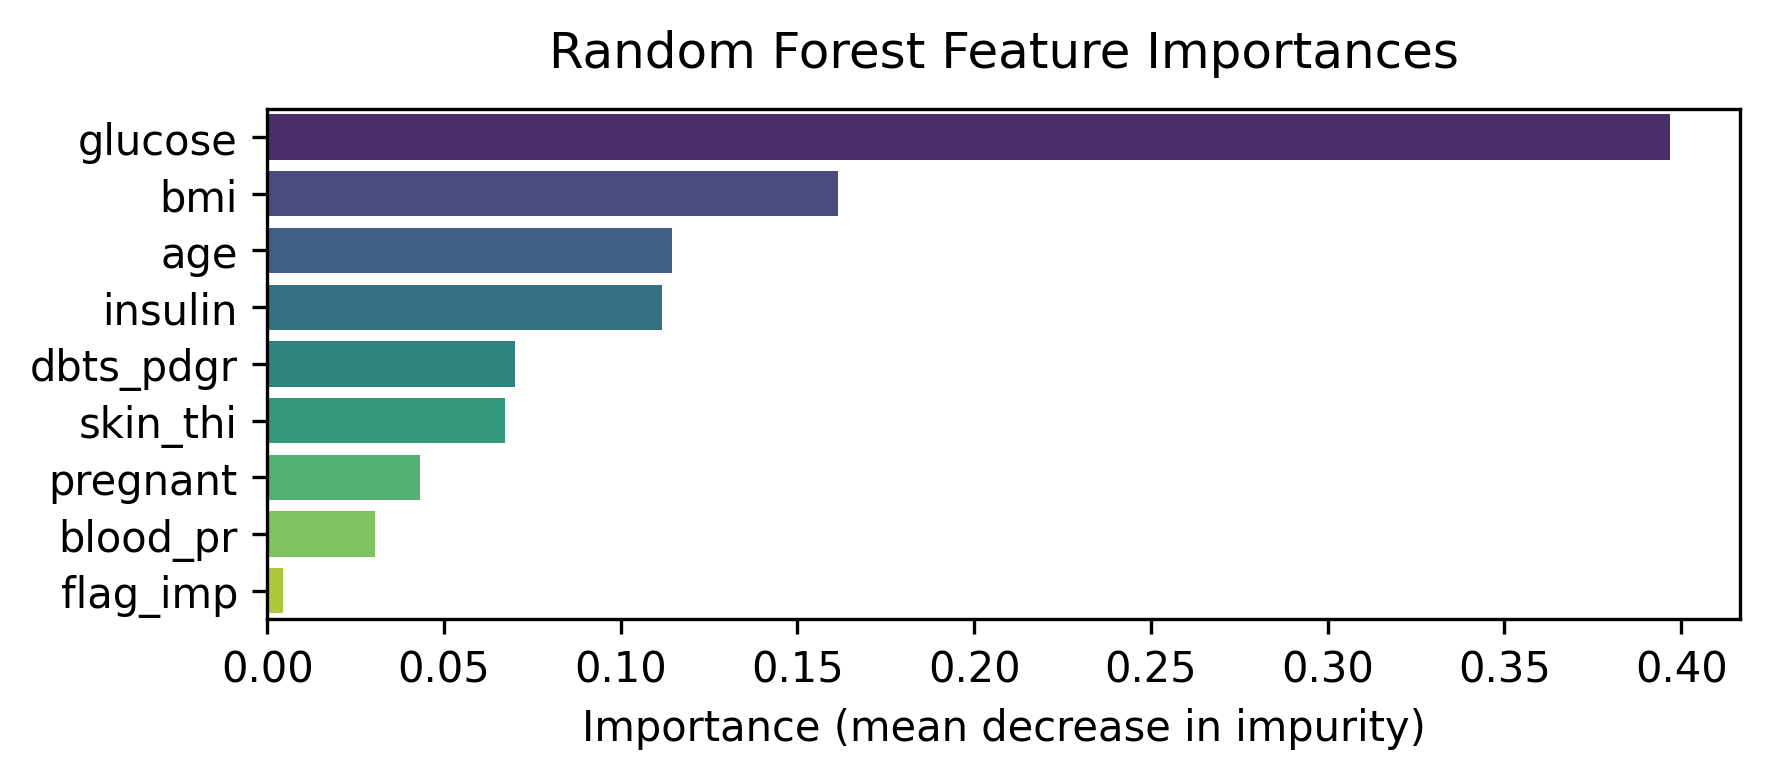

In [16]:
plot_rf_feature_importance(tuned_rf_model, X_train)

[06/03/25 17:01:56] WARNING  /Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro ]8;id=73440;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=87931;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/warnings.py#112\112]8;;\
                             /ipython/__init__.py:310: UserWarning: This is an experimental                        
                             feature, only Jupyter Notebook (>7.0), Jupyter Lab, IPython, and                      
                             VSCode Notebook are supported. If you encounter unexpected behaviour                  
                             or would like to suggest feature enhancements, add it under this                      
                             github issue https://github.com/kedro-org/kedro/issues/3580                           
                                                                                                                   

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 get_ipython().run_line_magic('load_node', 'plot_rf_feature_importance')                      │
│   2                                                                                              │
│                                                                                                  │
│ /Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/IPython/core/interactiveshell.p │
│ y:2482 in run_line_magic                                                                         │
│                                                                                                  │
│   2479 │   │   │   if getattr(fn, "needs_local_scope", False):                                   │
│   2480 │   │   │   │   kwargs['local_ns'] = self.get_local_scope(stack_depth)                    │
│   2481 │   │   │   with self.builtin_trap:                                                       │
│ ❱ 2482 │   │   │   │   result = fn(*args, **kwargs)                                              │
│   2483 │   │   │                                                                                 │
│   2484 │   │   │   # The code below prevents the output from being displayed                     │
│   2485 │   │   │   # when using magics with decorator @output_can_be_silenced                    │
│                                                                                                  │
│ /Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/ipython/__init__.py:240   │
│ in magic_load_node                                                                               │
│                                                                                                  │
│   237 │   parameters = parse_argstring(magic_load_node, args)                                    │
│   238 │   node_name = parameters.node                                                            │
│   239 │                                                                                          │
│ ❱ 240 │   cells = _load_node(node_name, pipelines)                                               │
│   241 │                                                                                          │
│   242 │   run_environment = _guess_run_environment()                                             │
│   243                                                                                            │
│                                                                                                  │
│ /Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/ipython/__init__.py:315   │
│ in _load_node                                                                                    │
│                                                                                                  │
│   312 │   │   "are supported. If you encounter unexpected behaviour or would like to suggest "   │
│   313 │   │   "feature enhancements, add it under this github issue https://github.com/kedro-o   │
│   314 │   )                                                                                      │
│ ❱ 315 │   node = _find_node(node_name, pipelines)                                                │
│   316 │   node_func = node.func                                                                  │
│   317 │                                                                                          │
│   318 │   imports_cell = _prepare_imports(node_func)                                             │
│                                                                                                  │
│ /Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-pac